# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


https://github.com/tansla/ydata-supervised-hw2

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [272]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [273]:
# * write a model `Ols` which has a property $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    return np.append(np.ones([X.shape[0],1]),X,axis=1)
  
  def fit(self, X, Y):
    #remember pad with 1 before fitting
    self._fit(self.pad(X), Y)    
  
  def _fit(self, X, Y):
    # optional to use this
    self.w = np.matmul(np.linalg.pinv(X), Y)
  
  def predict(self, X):
    #return w
    return self._predict(self.pad(X))

  def _predict(self, X):
    #return w
    # optional to use this
    return np.matmul(X , self.w )
    
  def score(self, X, Y):
    #return MSE
    return ((X-Y)**2).mean()
    

In [274]:
def plot_scatter(X,Y, title):
    plt.style.use('bmh')
    fig, ax = plt.subplots(figsize=(5,5))

    fig.suptitle(title)
    x_max = max(X.max(),Y.max())*1.05
    plt.scatter(X, Y)
    ax.set_xlim(0,x_max)
    ax.set_ylim(0,x_max)
    ax.set_xlabel('True labels')
    ax.set_ylabel('Predicted labels')

    lims = [ np.min([0,x_max]), np.max([0,x_max]) ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75)

    plt.show()


In [275]:
X, y = load_boston(return_X_y=True)

/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
my_ols = Ols()
my_ols.fit(X_train,y_train)
print(f'the training MSE = {my_ols.score(my_ols.predict(X_train),y_train):.4f}')

the training MSE = 19.6847


/Users/tansla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


MSE for TRAIN = 19.6847, for TEST = 29.4822


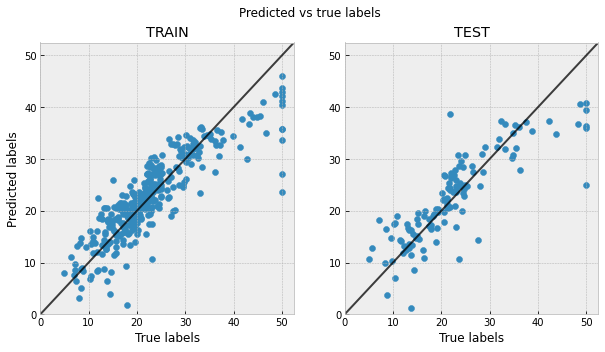

In [277]:
plt.style.use('bmh')
fig, ax = plt.subplots(1,2, figsize=(10,5))

fig.suptitle('Predicted vs true labels')
y_pred_train = my_ols.predict(X_train)
x_max_lim_train = max(y_train.max(),y_pred_train.max())*1.05

y_pred_test = my_ols.predict(X_test)
x_max_lim_test = max(y_test.max(),y_pred_test.max())*1.05


ax[0].set_ylabel('Predicted labels')

# train:
ax[0].set_title('TRAIN')
ax[0].scatter(y_train,y_pred_train)
ax[0].set_xlabel('True labels')
ax[0].set_xlim(0,x_max_lim_train)
ax[0].set_ylim(0,x_max_lim_train)
lims = [ np.min([0,x_max_lim_train]), np.max([0,x_max_lim_train]) ]
ax[0].plot(lims, lims, 'k-', alpha=0.75)

# test:
ax[1].set_title('TEST')
ax[1].scatter(y_test,y_pred_test)
ax[1].set_xlabel('True labels')
ax[1].set_xlim(0,x_max_lim_test)
ax[1].set_ylim(0,x_max_lim_test)
lims = [ np.min([0,x_max_lim_test]), np.max([0,x_max_lim_test]) ]
ax[1].plot(lims, lims, 'k-', alpha=0.75)

# fig.savefig('q1.png', dpi=300)
fig.show()

print(f'MSE for TRAIN = {my_ols.score(y_pred_train,y_train):.4f}, for TEST = {my_ols.score(y_pred_test, y_test):.4f}')

The mean MSE for TRAIN: 21.3398 and for the TEST: 24.9589
With H0 = [There is no significant difference between MSE on train and test] and threshold = 0.05 we got next results:
Since our pvalue (0.0807) >= 0.05 we CANNOT REJECT the null hypothesis


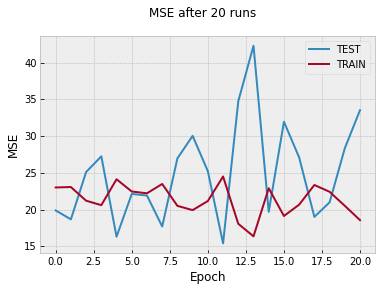

In [278]:
results_test = []
results_train = []
my_ols = Ols()
for i in range(21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    my_ols.fit(X_train,y_train)
    y_pred_train = my_ols.predict(X_train)
    mse_train = my_ols.score(y_pred_train,y_train)
    results_train.append(mse_train)

    y_pred = my_ols.predict(X_test)
    mse_test = my_ols.score(y_pred,y_test)
    results_test.append(mse_test)

mse_mean_test =  np.array(results_test).mean()
mse_mean_train =  np.array(results_train).mean()

p_value = stats.ttest_rel(results_test,results_train).pvalue

fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('MSE after 20 runs')
ax.plot(results_test, label='TEST')
ax.plot(results_train, label='TRAIN')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.legend()

print(f'The mean MSE for TRAIN: {mse_mean_train:.4f} and for the TEST: {mse_mean_test:.4f}')
threshold = 0.05
print(f'With H0 = [There is no significant difference between MSE on train and test] and threshold = {threshold} we got next results:')
if p_value >= threshold:
    print(f'Since our pvalue ({p_value:.4f}) >= {threshold} we CANNOT REJECT the null hypothesis')
else:
    print(f'Since our pvalue ({p_value:.4f}) < {threshold} we REJECT the null hypothesis')


In [279]:
# Write a new class OlsGd which solves the problem using gradient descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 

# How would you find number of iteration automatically? 
# A: We could set a treshhold for stop by using the loss convergance
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self._x_max = None
    self._x_min = None

  def fit(self, X):
    self._x_max = X.max(axis=0)
    self._x_min = X.min(axis=0)
    self._x_min[self._x_max == self._x_min] = 0

  def predict(self, X):
    #apply normalization
    return (X - self._x_min)/(self._x_max - self._x_min) 
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.0005, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True,
               track_loss=False):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    self.track_loss = track_loss
    
  def _fit(self, X, Y, reset=True):
    #remember to normalize the data before starting
    losses =[]
    if self.normalize:
      self.normalizer.fit(X)
      X = self.normalizer.predict(X)
    self.w = np.zeros(X.shape[1])
    # self.w = np.random.rand(X.shape[1])
    for epoch in range(self.num_iteration):
      losses.append(self.score(self.__predict(X),Y))
      self._step(X,Y)
      if (epoch > 2) & (self.early_stop):
        if losses[-1] > losses[-2]:
          break 
      if self.verbose:
        print(f'Epoch={epoch}, MSE={losses[-1]:.6f}')
    if self.track_loss:
      fig, ax = plt.subplots(figsize=(6,2))
      fig.suptitle(f'Loss function with learning_rate = {self.learning_rate}')
      ax.set_xlabel('num_iteration')
      ax.set_ylabel('score')
      plt.plot(losses)   

  def __predict(self, X):
      return np.matmul(X , self.w )


  def _predict(self, X):
    #remember to normalize the data before starting
      if self.normalize:
        X = self.normalizer.predict(X)
      return self.__predict(X)
    
      
  def _step(self, X, Y):
    # use w update for gradient descent
    N = X.shape[0]
    self.w = self.w -  (2*self.learning_rate/N)*(np.matmul(X.transpose(), self.__predict(X) - Y))

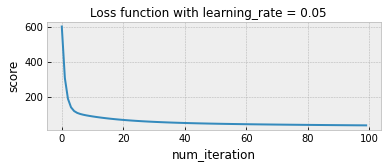

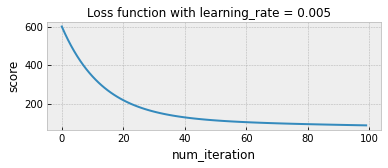

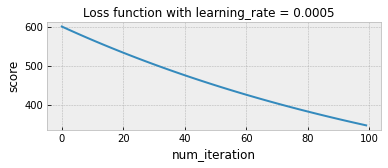

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for learning_rate in [0.05,0.005, 0.0005]:
    my_ols = OlsGd(num_iteration=100,learning_rate=learning_rate, early_stop=False, track_loss=True, verbose=False)
    my_ols.fit(X_train,y_train)
    y_pred = my_ols.predict(X_test)
    my_ols.score(y_pred,y_test)


The choosen $\alpha$ is important.

Q: How would you find number of iteration automatically? 

A: We could set a treshhold for stop by using the loss convergance

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



$L=(Y-\hat{Y})^T(y-\hat{Y}) + \lambda W^TW = (Y-XW)^T(y-XW) + \lambda W^TW $

Now, let's calculate the derivative and we want it to be equal 0:

$L'=-2X^T(Y-W^TX) + 2\lambda W = 0=>$ 

$\lambda W =  X^T(Y-W^TX) $

$ \lambda W + X^TXW =X^TY  $

$ (\lambda I + X^TX)W = X^TY $

$ W = (\lambda I + X^TX)^TX^TY $


In [281]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    part1 = np.linalg.inv(np.matmul(X.T,X) + self.ridge_lambda * np.identity(X.shape[1]))
    self.w = np.matmul(np.matmul(part1,X.T),Y)
    

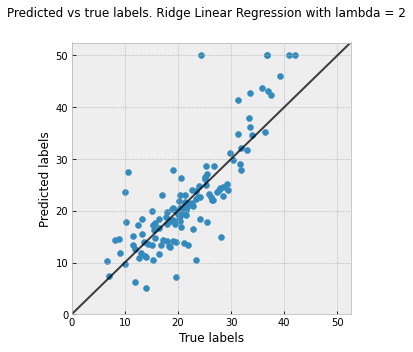

In [282]:

ridge_lambda = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
my_ols = RidgeLs(ridge_lambda)
my_ols.fit(X_train,y_train)
y_pred = my_ols.predict(X_test)
label = f'Predicted vs true labels. Ridge Linear Regression with lambda = {ridge_lambda}'
plot_scatter(y_pred, y_test,label)


### Use scikitlearn implementation for OLS, Ridge and Lasso

In [283]:
#Split data for check on different models from sklearn below:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Mean squared error: 32.50


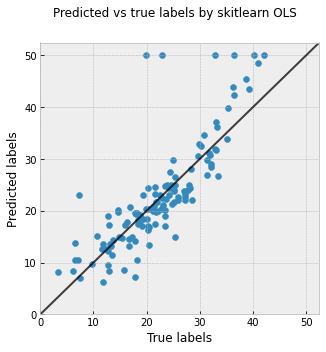

In [284]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs
plot_scatter(y_pred, y_test,'Predicted vs true labels by skitlearn OLS')

Mean squared error: 32.57


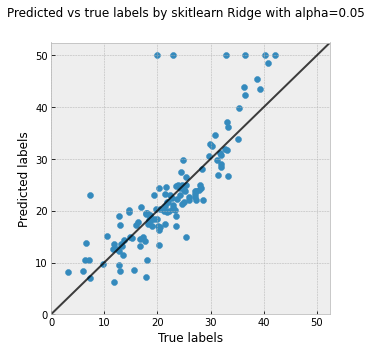

In [285]:
alpha = 0.05
regr = linear_model.Ridge(alpha=alpha)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs
plot_scatter(y_pred, y_test,f'Predicted vs true labels by skitlearn Ridge with alpha={alpha}')

Mean squared error: 43.15


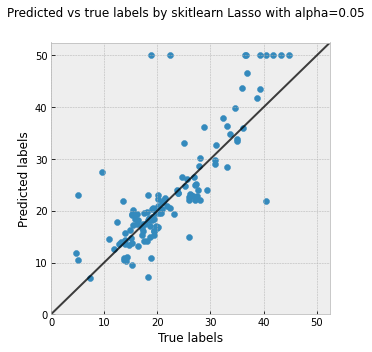

In [286]:
alpha = 0.05
regr = linear_model.Lasso(alpha=alpha)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs
plot_scatter(y_pred, y_test,f'Predicted vs true labels by skitlearn Lasso with alpha={alpha}')

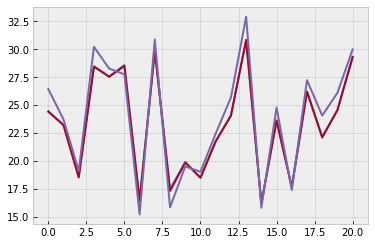

In [287]:
# Let's use 20 times each of the methods and check results:

alpha = 0.05
regr_ols = linear_model.LinearRegression()
regr_ridge = linear_model.Ridge(alpha=alpha)
regr_lasso = linear_model.Lasso(alpha=alpha)

models = [regr_ols, regr_ridge, regr_lasso]
errors = []

def study_and_return_mse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

for epoch in range(21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    error_epoch = []
    for model in models:
        error_epoch.append(study_and_return_mse(model,X_train, X_test, y_train, y_test))
    errors.append(error_epoch)

errors = np.array(errors)

plt.plot(errors[:,0])
plt.plot(errors[:,1])
plt.plot(errors[:,2])

We could see that the result is more sensible for randomness of how we split the data than for the method that we choose. 